This task is totally based on python 3.9 which is used as a stastical software for data analytics,visualization and predictive modiling. In this task we extract several information from dataset like annual income and correlation between others atributes of coustomer. And visualizing the correlation. Once i get the points of correlation between several atributes ,bulid a machinelearning model which is predict the anual income of a coustomer. And check the accuracy of the model over the test dataset.

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data.

In [10]:
#import our necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Dataset & put it on pandas dataframe**

**Mounting Drive into the Colab** meaning that setting up the google drive account as a virtual drive so that i can access the resources of the drive just like a local hard drive.

In [2]:
#import it into a dataframe and featch first five rows of dataset
data = pd.read_excel('/content/ANZ synthesised transaction dataset.xlsx')
data.head(10) 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


data.columns attribute to return the column labels of the given Dataframe.

In [ ]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

data.describe()  calculating some statistical data like percentile, mean and std of the numerical values of the dataframe.

In [ ]:
data.describe().round(2)

,card_present_flag,merchant_code,balance,age,amount
count,7717.0,883.0,12043.00,12043.00,12043.00
mean,0.8,0.0,14704.20,30.58,187.93
std,0.4,0.0,31503.72,10.05,592.60
min,0.0,0.0,0.24,18.00,0.10
25%,1.0,0.0,3158.58,22.00,16.00
50%,1.0,0.0,6432.01,28.00,29.00
75%,1.0,0.0,12465.94,38.00,53.66
max,1.0,0.0,267128.52,78.00,8835.98


Shape of the dataset with rows and columns

In [ ]:

data.shape

(12043, 23)

In this Exploryay Data Analysis **(EDA)** problem ,i will analyze 
*   Missing value
*   All the numerical variable 
*   Distribution of numerical variable






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Number of unique value prest in each features

In [ ]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

Total missing value in dataset, according to each features.

In [ ]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

Seaborn heatmap representation of missing value present in dataframe.
Yellow lines repesnt the missing values.

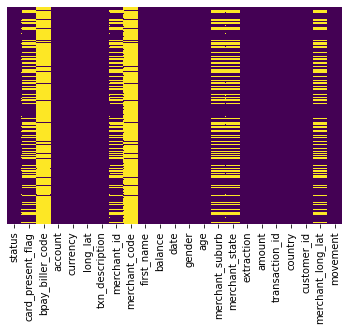

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, i will cheek percentage of missing values value in each features.

In [ ]:
nan_value_features = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in nan_value_features:
  print(feature, np.round(data[feature].isnull().mean(), 2),  ' % missing values')

card_present_flag 0.36  % missing values
bpay_biller_code 0.93  % missing values
merchant_id 0.36  % missing values
merchant_code 0.93  % missing values
merchant_suburb 0.36  % missing values
merchant_state 0.36  % missing values
merchant_long_lat 0.36  % missing values


Drop down the unnecessary features which has higher order of missing value.
Grouping the dataframe according to date, ammount, first_name, card flag,balance and gender & their age.

In [4]:
f_data=data.drop(['merchant_id','merchant_code','bpay_biller_code'],axis=1)
f_data.groupby([pd.Grouper(key='date', freq='M'),'amount' ,'first_name','gender']).sum()

card_present_flag    balance  age
date       amount  first_name gender                                   
2018-08-31 1.52    Edward     M                     0.0    5054.84   19
           1.59    Diana      F                     1.0    1298.54   26
           1.71    Jessica    F                     0.0    2070.40   21
           1.90    Tonya      F                     1.0    2721.99   27
           2.00    Diana      F                     1.0     536.62   26
...                                                 ...        ...  ...
2018-10-31 4910.90 Jacqueline F                     0.0    7397.59   30
           5103.51 Christine  F                     0.0   43167.57   78
           6107.23 Ronald     M                     0.0   10753.02   25
           7081.09 Michele    F                     1.0    2063.14   30
           8835.98 Tim        M                     0.0  162944.60   80

[9396 rows x 3 columns]

Get a Series containing counts of unique values present in features like status, gender etc.

In [ ]:
f_data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [ ]:
f_data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [ ]:
f_data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

Visualize the relationship between categorical variables with continuous variable using seabon catplot.

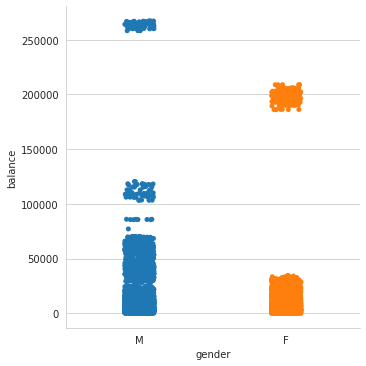

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x="gender", y="balance", order=["M", "F"], data=f_data)

Average amount of transction 

In [ ]:
f_data['amount'].mean()

187.93358797641767

Average balance present in dataframe.

In [ ]:
f_data['balance'].mean()

14704.195553433592

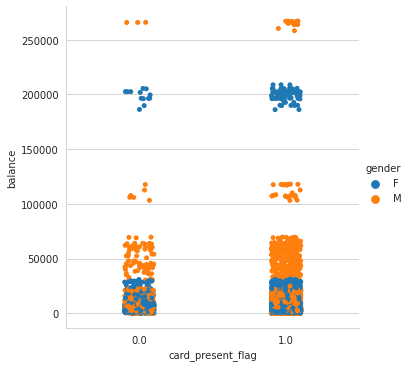

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x="card_present_flag", y="balance", hue='gender', data=f_data)

 **distplot** plots a univariate distribution of observations of age features.
 **.hist** histrogram represtation of data present in the features in the dataframe.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


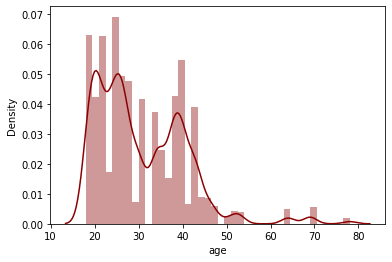

In [5]:
sns.distplot(f_data['age'].dropna(),color='darkred',bins=40)

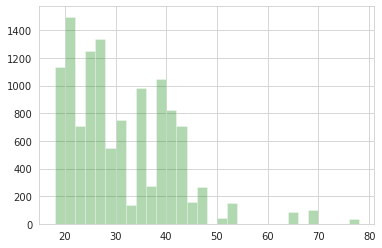

In [ ]:
f_data['age'].hist(bins=30,color='green',alpha=0.3)

Draw a plot of two variables continuous and dicreate with bivariate and univariate graphs.

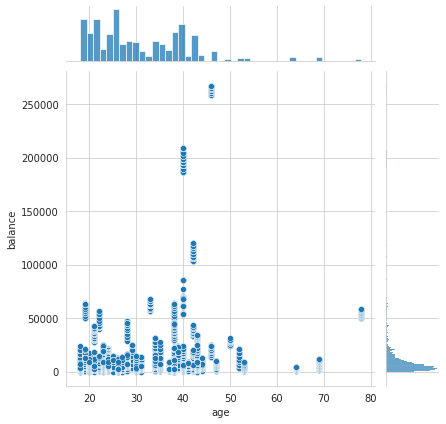

In [ ]:
sns.jointplot(x='age',y='balance',data=f_data)

seaborn heatmap of corealation between all features present in dataframe

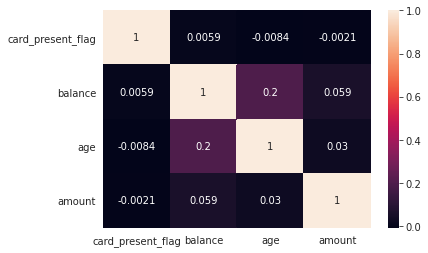

In [ ]:
 sns.heatmap(f_data.corr(), annot=True)

Counting of transction of each month according to date with respect movement. & status of card. 

In [ ]:
f_data['month'] = pd.DatetimeIndex(f_data['date']).month

Text(0.5, 1.0, 'status of card in counting of txn')

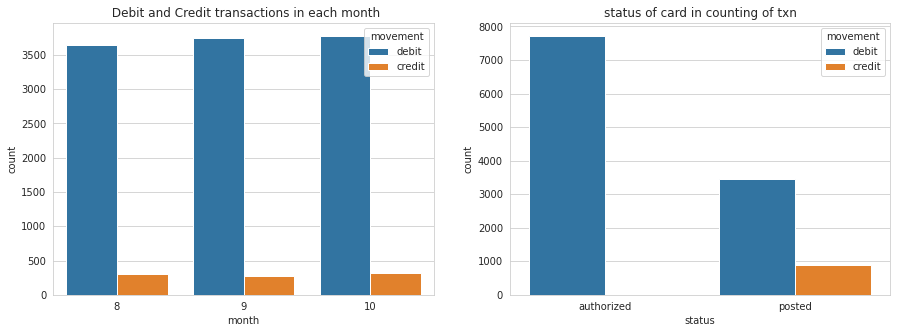

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.countplot(x='month',hue='movement',data=f_data)
plt.title(' Debit and Credit transactions in each month')
plt.subplot(1,2,2)
sns.countplot(x='status',hue='movement',data=f_data)
plt.title('status of card in counting of txn')